In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [ ]:
from sklearn.cluster import KMeans
X=np.array([[1,2],[1,4],[1,0],[10,4],[10,0]])
X

In [ ]:
kmeans=KMeans(n_clusters=3)

In [ ]:
kmeans.fit(X)

In [ ]:
kmeans.labels_

This means first three points will be considered as cluster 0 
then 4th point considered as 1st cluster and 5th point as last cluster

In [ ]:
plt.scatter(X[:,0],X[:,1])

In [ ]:
data=pd.DataFrame(X)
data

In [ ]:
labels=pd.DataFrame(kmeans.labels_)
labels

In [ ]:
datawithlabels=pd.concat([data,labels],axis=1)
datawithlabels

In [ ]:
kmeans.cluster_centers_  # Gives cluster centers or centroids

array([[ 1.,  2.],
       [10.,  4.],
       [10.,  0.]])

In [30]:
test_data=np.array([[0,0],[12,3],[20,21]])

In [31]:
test_data

array([[ 0,  0],
       [12,  3],
       [20, 21]])

In [32]:
kmeans.predict(test_data)

array([0, 1, 1], dtype=int32)

In [33]:
X,y=make_blobs(n_samples=1000,centers=3,n_features=2,random_state=10)
X

array([[ 4.56889035, -9.9492391 ],
       [ 2.35388502,  3.51466401],
       [-0.01750156, -6.05038477],
       ...,
       [ 4.89123569,  4.86995972],
       [ 1.09272697,  4.04641343],
       [ 0.97077866, -4.8289551 ]], shape=(1000, 2))

In [34]:
y

array([0, 1, 2, 2, 1, 2, 2, 2, 2, 2, 0, 1, 0, 0, 2, 2, 2, 0, 0, 0, 2, 0,
       2, 2, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 2, 1, 1,
       0, 1, 2, 2, 0, 0, 0, 2, 1, 2, 1, 2, 2, 0, 1, 1, 2, 2, 0, 1, 2, 0,
       1, 0, 1, 1, 1, 2, 2, 0, 2, 2, 0, 0, 0, 2, 2, 2, 1, 2, 1, 0, 1, 2,
       2, 1, 1, 0, 0, 1, 2, 0, 1, 0, 0, 1, 1, 2, 1, 1, 2, 0, 2, 1, 0, 2,
       2, 1, 0, 1, 2, 0, 1, 2, 2, 1, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1, 1, 2,
       1, 2, 2, 2, 2, 0, 2, 2, 0, 1, 2, 0, 1, 0, 2, 1, 1, 2, 1, 0, 0, 2,
       2, 1, 2, 2, 1, 2, 1, 2, 0, 0, 1, 1, 1, 1, 0, 2, 1, 2, 2, 2, 0, 0,
       2, 0, 0, 0, 2, 2, 0, 2, 1, 1, 2, 2, 2, 1, 2, 2, 0, 0, 1, 0, 1, 1,
       2, 2, 2, 0, 1, 2, 0, 0, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 0, 0, 1, 2,
       1, 2, 0, 0, 2, 1, 2, 1, 0, 2, 1, 0, 1, 0, 2, 2, 0, 1, 2, 2, 1, 2,
       1, 0, 0, 1, 2, 2, 2, 1, 2, 1, 0, 1, 1, 1, 1, 2, 1, 1, 0, 0, 1, 2,
       1, 0, 2, 0, 1, 0, 0, 1, 2, 0, 2, 0, 1, 1, 0, 0, 0, 1, 2, 1, 1, 0,
       0, 0, 0, 2, 2, 1, 1, 1, 2, 1, 2, 0, 0, 2, 2,

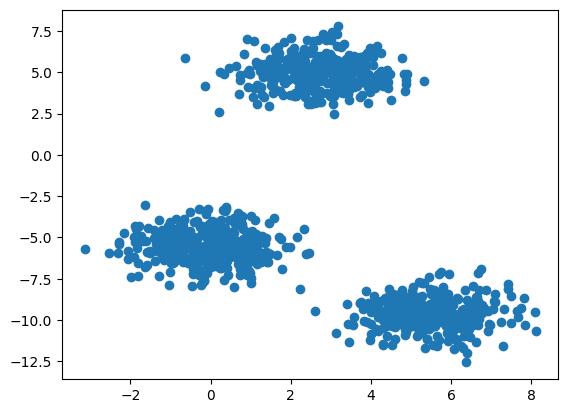

In [35]:
plt.scatter(X[:,0],X[:,1])

In [37]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=20)

In [38]:
wcss=[]
for k in range(2,11):
    kmean=KMeans(n_clusters=k,init='k-means++')
    kmean.fit(X_train)
    wcss.append(kmean.inertia_)

In [39]:
wcss

[6350.499237030179,
 1230.8405264123764,
 1081.886067347284,
 933.9987529306916,
 884.6180136485902,
 761.2669906474903,
 660.9618001701604,
 594.9390752061674,
 499.2808192918857]

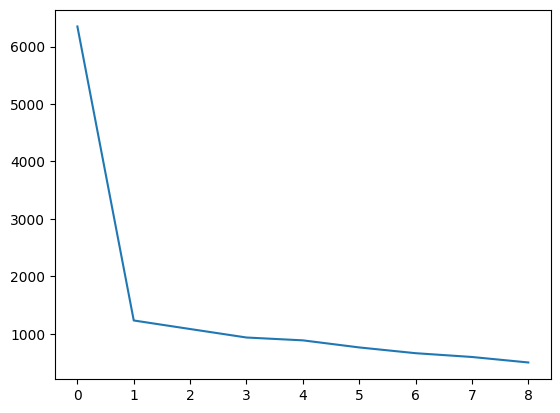

In [40]:
plt.plot(wcss)

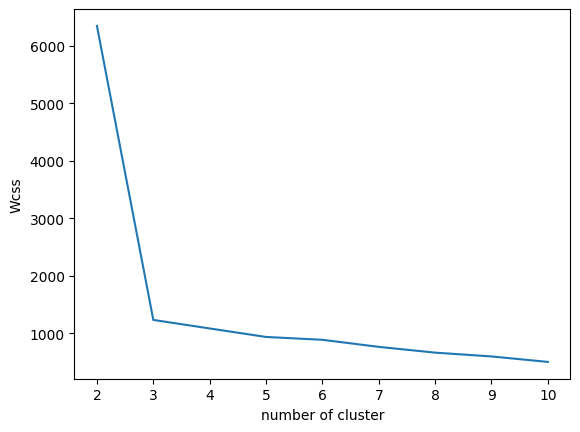

In [42]:
plt.plot(range(2,11),wcss)
plt.xticks(range(2,11))
plt.xlabel('number of cluster')
plt.ylabel('Wcss')
plt.show()

In [43]:
kmeans=KMeans(n_clusters=3,init='k-means++')

In [44]:
y_labels=kmeans.fit_predict(X_train)

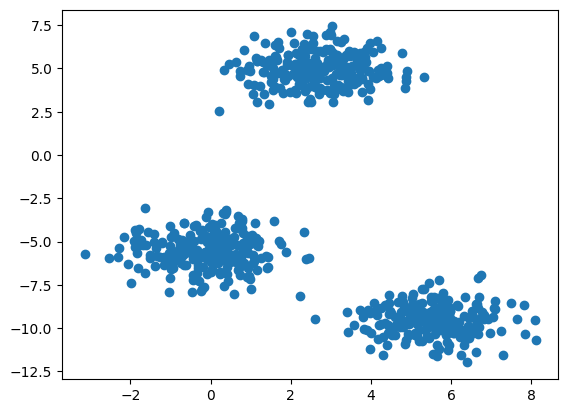

In [45]:
plt.scatter(X_train[:,0],X_train[:,1])

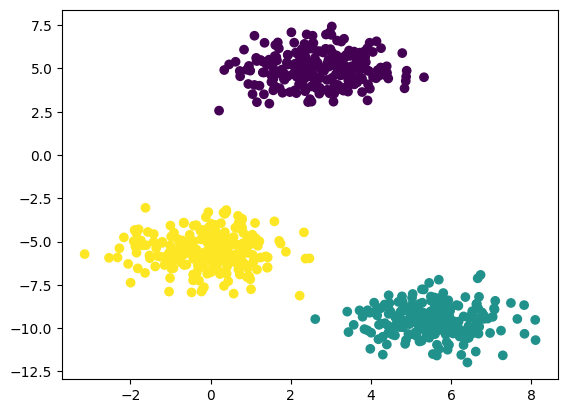

In [46]:
# check how correct predictions are 
plt.scatter(X_train[:,0],X_train[:,1],c=y_labels)

In [47]:
from sklearn.metrics import silhouette_score

In [48]:
silhouette_coefficients=[]
for k in range(2,11):
    kmeans=KMeans(n_clusters=k,init='k-means++')
    kmeans.fit(X_train)
    score=silhouette_score(X_train,kmeans.labels_)
    silhouette_coefficients.append(score)

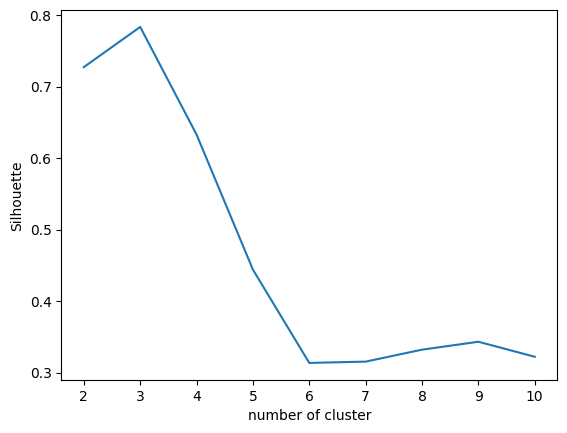

In [50]:
plt.plot(range(2,11),silhouette_coefficients)
plt.xticks(range(2,11))
plt.xlabel('number of cluster')
plt.ylabel('Silhouette')
plt.show()